# Phase I

## Importing the required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


## Accessing the dataset

In [5]:
data = pd.read_csv('uncleaned_crop_yield.csv')
df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             950000 non-null   float64
 4   Temperature_Celsius     950001 non-null   float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         950000 non-null   float64
 9   Yield_tons_per_hectare  950000 non-null   float64
dtypes: bool(2), float64(4), object(4)
memory usage: 62.9+ MB
None


## Data Cleaning Steps

### 1. Removing Duplicates

In [8]:
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             950000 non-null   float64
 4   Temperature_Celsius     950001 non-null   float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         950000 non-null   float64
 9   Yield_tons_per_hectare  950000 non-null   float64
dtypes: bool(2), float64(4), object(4)
memory usage: 62.9+ MB
None


### 2. Replace data inplace

In [10]:
df['Rainfall_mm'] = df['Rainfall_mm'].fillna(value=df['Rainfall_mm'].mean())
df['Temperature_Celsius'] = df['Temperature_Celsius'].fillna(value=df['Temperature_Celsius'].mean())
df['Days_to_Harvest'] = df['Days_to_Harvest'].fillna(value=df['Days_to_Harvest'].mean())

df.dropna(subset='Yield_tons_per_hectare', inplace=True)
print(df.isnull().sum())

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


### 3. Remove leading and trailing white spaces

In [12]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### 4. Consistency in columns

In [14]:
print(df['Fertilizer_Used'].unique())
print(df['Irrigation_Used'].unique())

[False  True]
[ True False]


In [15]:
change_type = {
    False: 'F',
    True: 'T'
}
df['Fertilizer_Used'] = df['Fertilizer_Used'].replace(change_type)

df['Irrigation_Used'] = df['Irrigation_Used'].replace(change_type)

In [16]:
print(df['Fertilizer_Used'].unique())
print(df['Irrigation_Used'].unique())

['F' 'T']
['T' 'F']


### 5. Capitalize all string type data column

In [18]:
df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius Fertilizer_Used  \
0   WEST     SANDY   COTTON   897.077239            27.676966               F   
1  SOUTH      CLAY     RICE   992.673282            18.026142               T   
3  NORTH     SANDY  SOYBEAN   986.866331            16.644190               F   
4  SOUTH      SILT    WHEAT   730.379174            31.620687               T   
5  SOUTH      SILT  SOYBEAN   797.471182            37.704974               F   

  Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
0               T            CLOUDY       122.000000                6.555816  
1               T             RAINY       140.000000                8.527341  
3               T             RAINY       146.000000                6.517573  
4               T            CLOUDY       110.000000                7.248251  
5               T             RAINY       104.497607                5.898416

### 6. Convert Region and Crop to categorical data

In [20]:
df['Region'] = df['Region'].astype('category')
df['Crop'] = df['Crop'].astype('category')

### 7. Rounding decimal places to 2

In [22]:
df['Rainfall_mm'] = df['Rainfall_mm'].round(2)

### 8. Outliers removal

In [24]:
for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949908 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Region                  949908 non-null  category
 1   Soil_Type               949908 non-null  object  
 2   Crop                    949908 non-null  category
 3   Rainfall_mm             949908 non-null  float64 
 4   Temperature_Celsius     949908 non-null  float64 
 5   Fertilizer_Used         949908 non-null  object  
 6   Irrigation_Used         949908 non-null  object  
 7   Weather_Condition       949908 non-null  object  
 8   Days_to_Harvest         949908 non-null  float64 
 9   Yield_tons_per_hectare  949908 non-null  float64 
dtypes: category(2), float64(4), object(4)
memory usage: 67.0+ MB


### 9. One-hot-encoding

In [26]:
encoded_df = pd.get_dummies(df,columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition', 'Irrigation_Used', 'Fertilizer_Used'], dtype=float)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949908 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rainfall_mm               949908 non-null  float64
 1   Temperature_Celsius       949908 non-null  float64
 2   Days_to_Harvest           949908 non-null  float64
 3   Yield_tons_per_hectare    949908 non-null  float64
 4   Region_EAST               949908 non-null  float64
 5   Region_NORTH              949908 non-null  float64
 6   Region_SOUTH              949908 non-null  float64
 7   Region_WEST               949908 non-null  float64
 8   Soil_Type_CHALKY          949908 non-null  float64
 9   Soil_Type_CLAY            949908 non-null  float64
 10  Soil_Type_LOAM            949908 non-null  float64
 11  Soil_Type_PEATY           949908 non-null  float64
 12  Soil_Type_SANDY           949908 non-null  float64
 13  Soil_Type_SILT            949908 non-null  float6

### 10. Normalization using MinMaxScaler()


In [28]:
scaler = MinMaxScaler()
encoded_df[['Rainfall_mm', 'Temperature_Celsius']] = scaler.fit_transform(encoded_df[['Rainfall_mm', 'Temperature_Celsius']])
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949908 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rainfall_mm               949908 non-null  float64
 1   Temperature_Celsius       949908 non-null  float64
 2   Days_to_Harvest           949908 non-null  float64
 3   Yield_tons_per_hectare    949908 non-null  float64
 4   Region_EAST               949908 non-null  float64
 5   Region_NORTH              949908 non-null  float64
 6   Region_SOUTH              949908 non-null  float64
 7   Region_WEST               949908 non-null  float64
 8   Soil_Type_CHALKY          949908 non-null  float64
 9   Soil_Type_CLAY            949908 non-null  float64
 10  Soil_Type_LOAM            949908 non-null  float64
 11  Soil_Type_PEATY           949908 non-null  float64
 12  Soil_Type_SANDY           949908 non-null  float64
 13  Soil_Type_SILT            949908 non-null  float6

## Exploratory Data Analysis

### 1. Bar plot: Count of each crop type

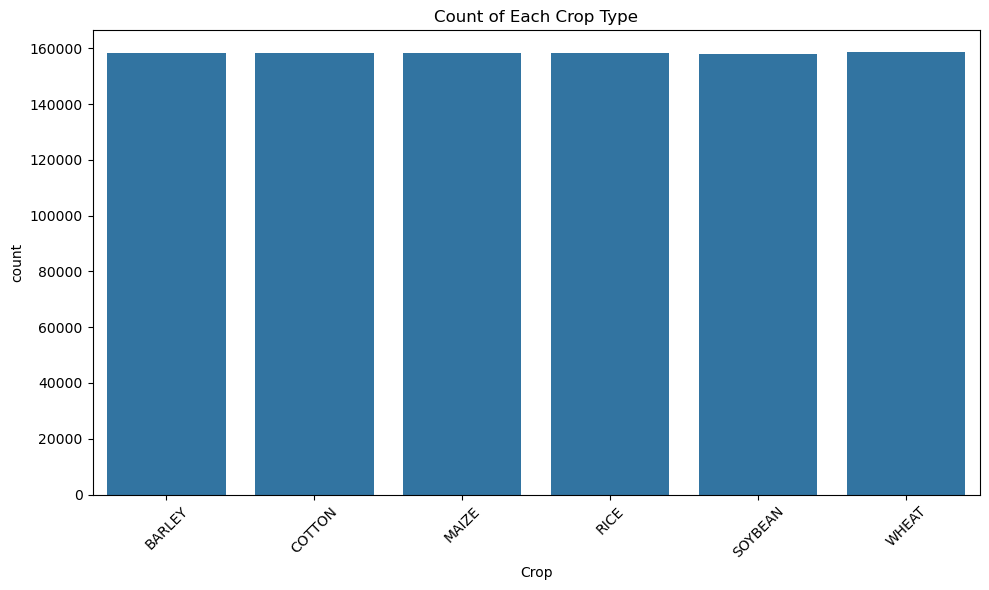

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Crop')
plt.title("Count of Each Crop Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Pie chart: Proportion of regions

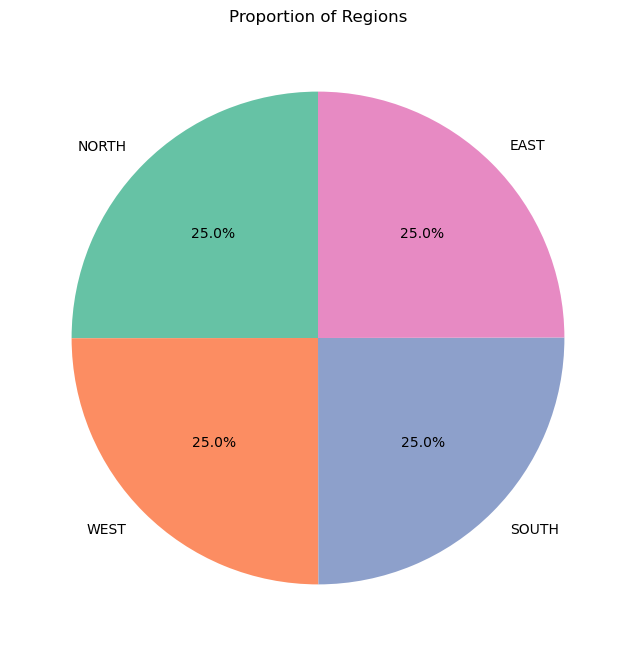

In [33]:
plt.figure(figsize=(8, 8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Proportion of Regions")
plt.ylabel('')
plt.show()

### 3. Box plot: Distribution of rainfall across different crops

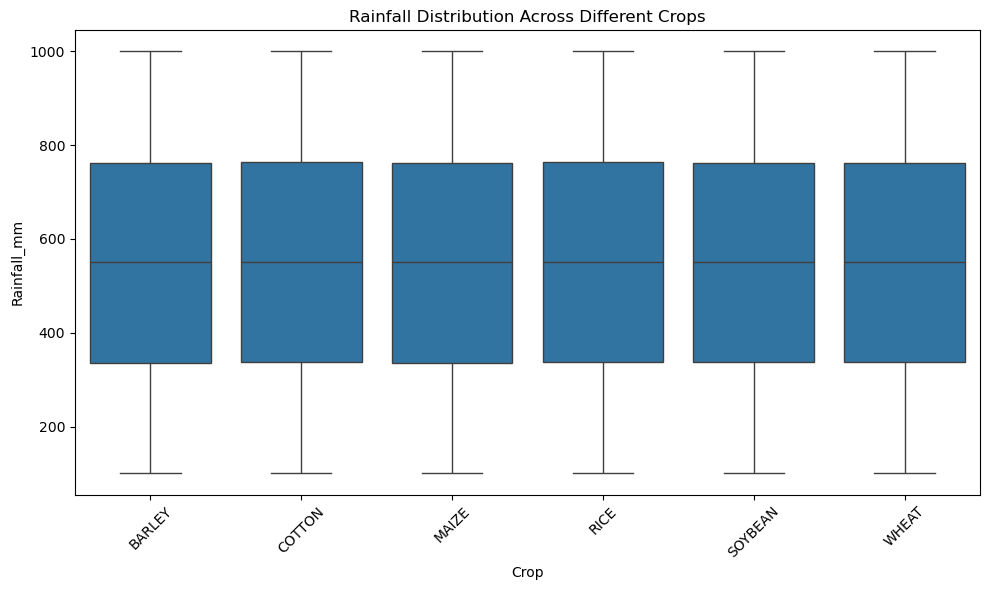

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Crop', y='Rainfall_mm')
plt.title("Rainfall Distribution Across Different Crops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Histogram: Distribution of temperature

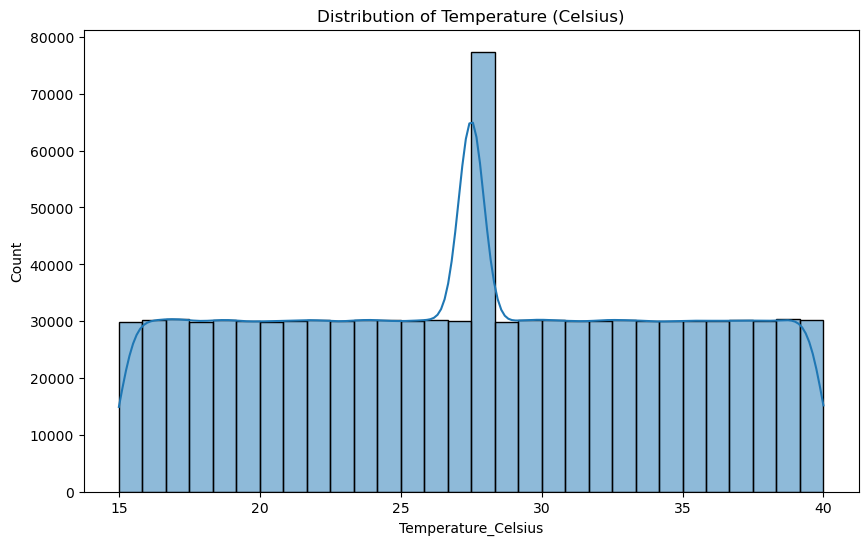

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_Celsius'], kde=True, bins=30)
plt.title("Distribution of Temperature (Celsius)")
plt.show()


### 5. Pairplot: Relationship among continuous variables

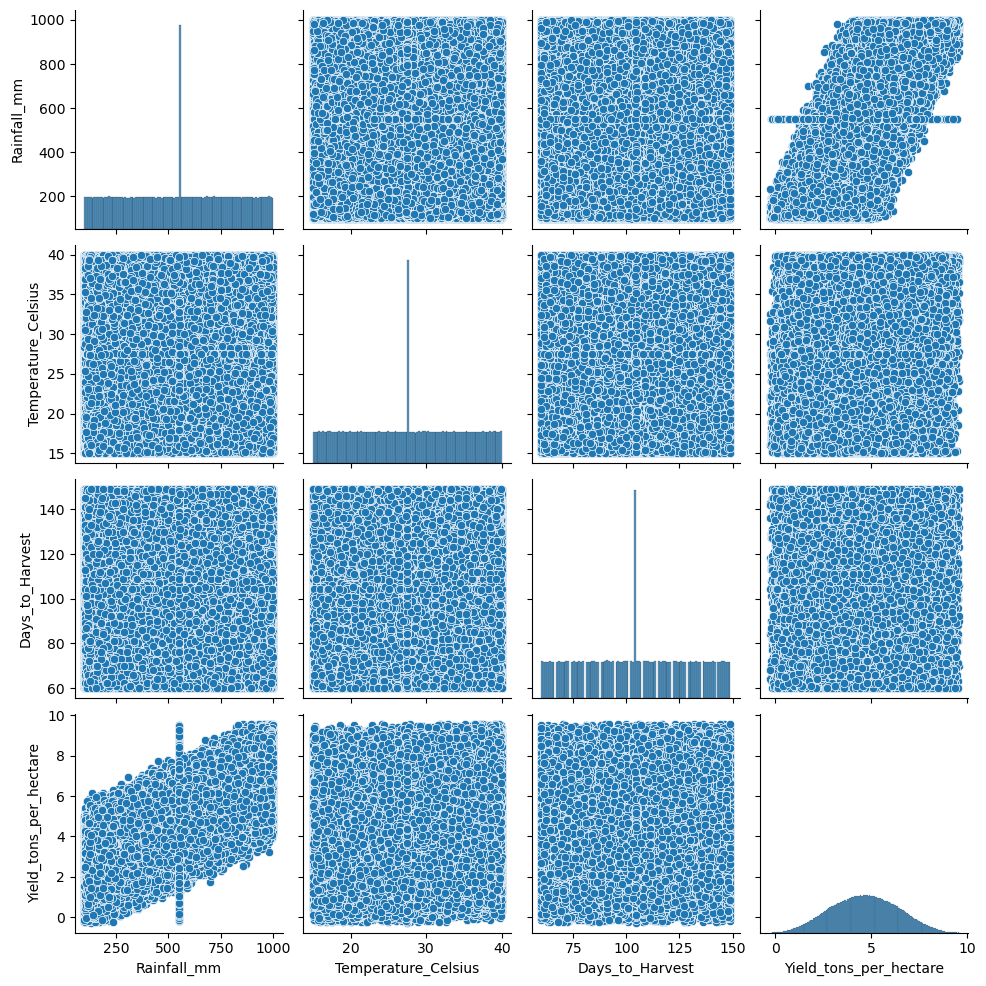

In [39]:
sns.pairplot(df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']])
plt.show()

### 6. Box plot: Yield distribution across soil types


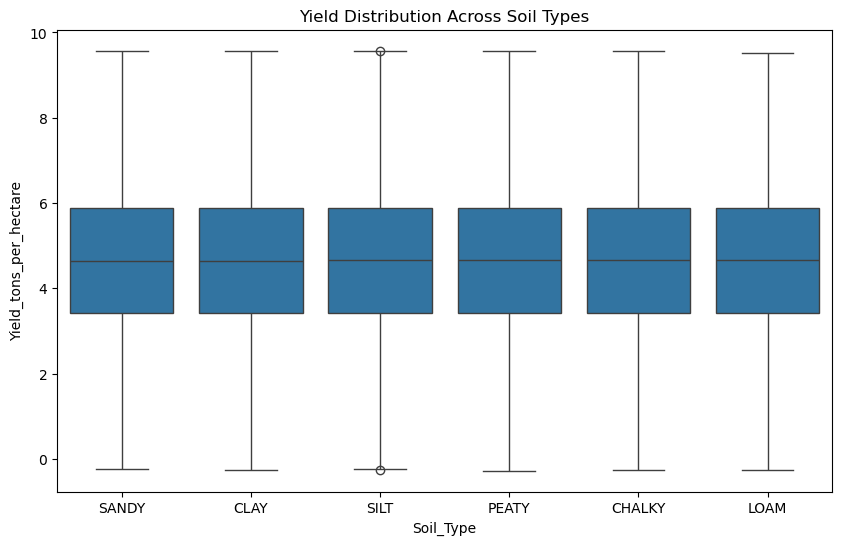

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Soil_Type', y='Yield_tons_per_hectare')
plt.title("Yield Distribution Across Soil Types")
plt.show()

### 7. Strip plot: Rainfall across different regions

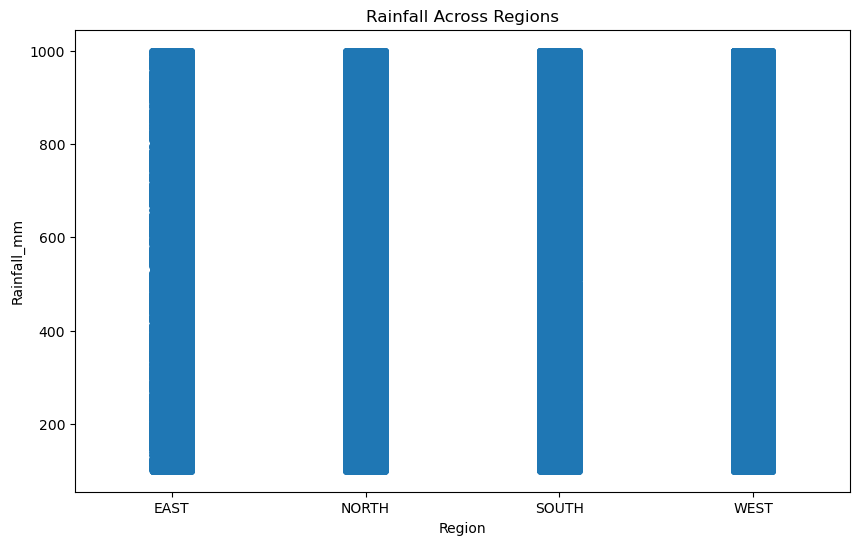

In [43]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Region', y='Rainfall_mm', jitter=True)
plt.title("Rainfall Across Regions")
plt.show()

### 8. Bar plot: Average yield by region


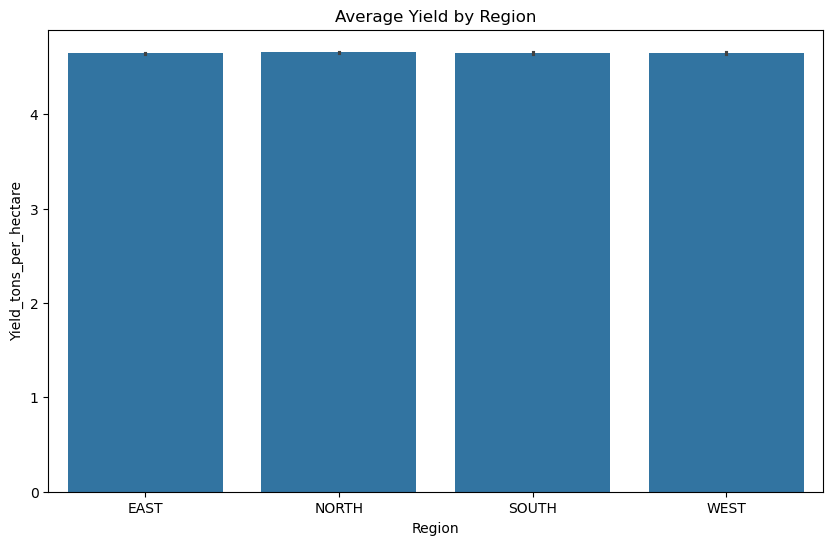

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Yield_tons_per_hectare', estimator='mean')
plt.title("Average Yield by Region")
plt.show()

### 9. FacetGrid: Relationship between fertilizer usage and yield, separated by irrigation

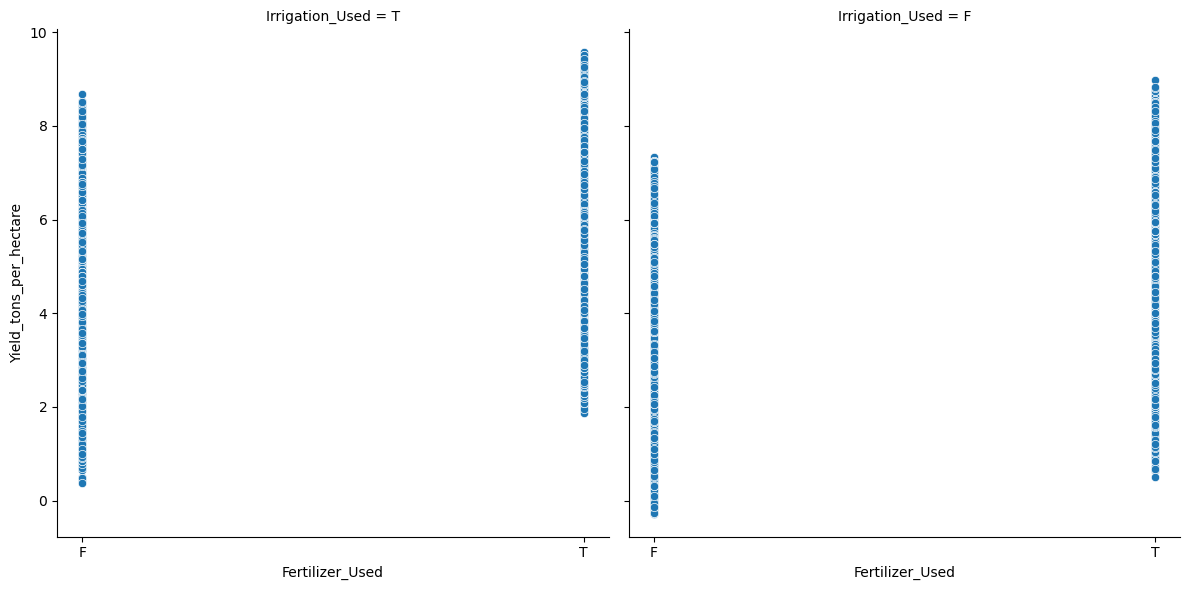

In [47]:
g = sns.FacetGrid(df, col='Irrigation_Used', height=6, aspect=1)
g.map(sns.scatterplot, 'Fertilizer_Used', 'Yield_tons_per_hectare')
plt.show()

### 10. Heatmap: Correlation matrix of continuous variable


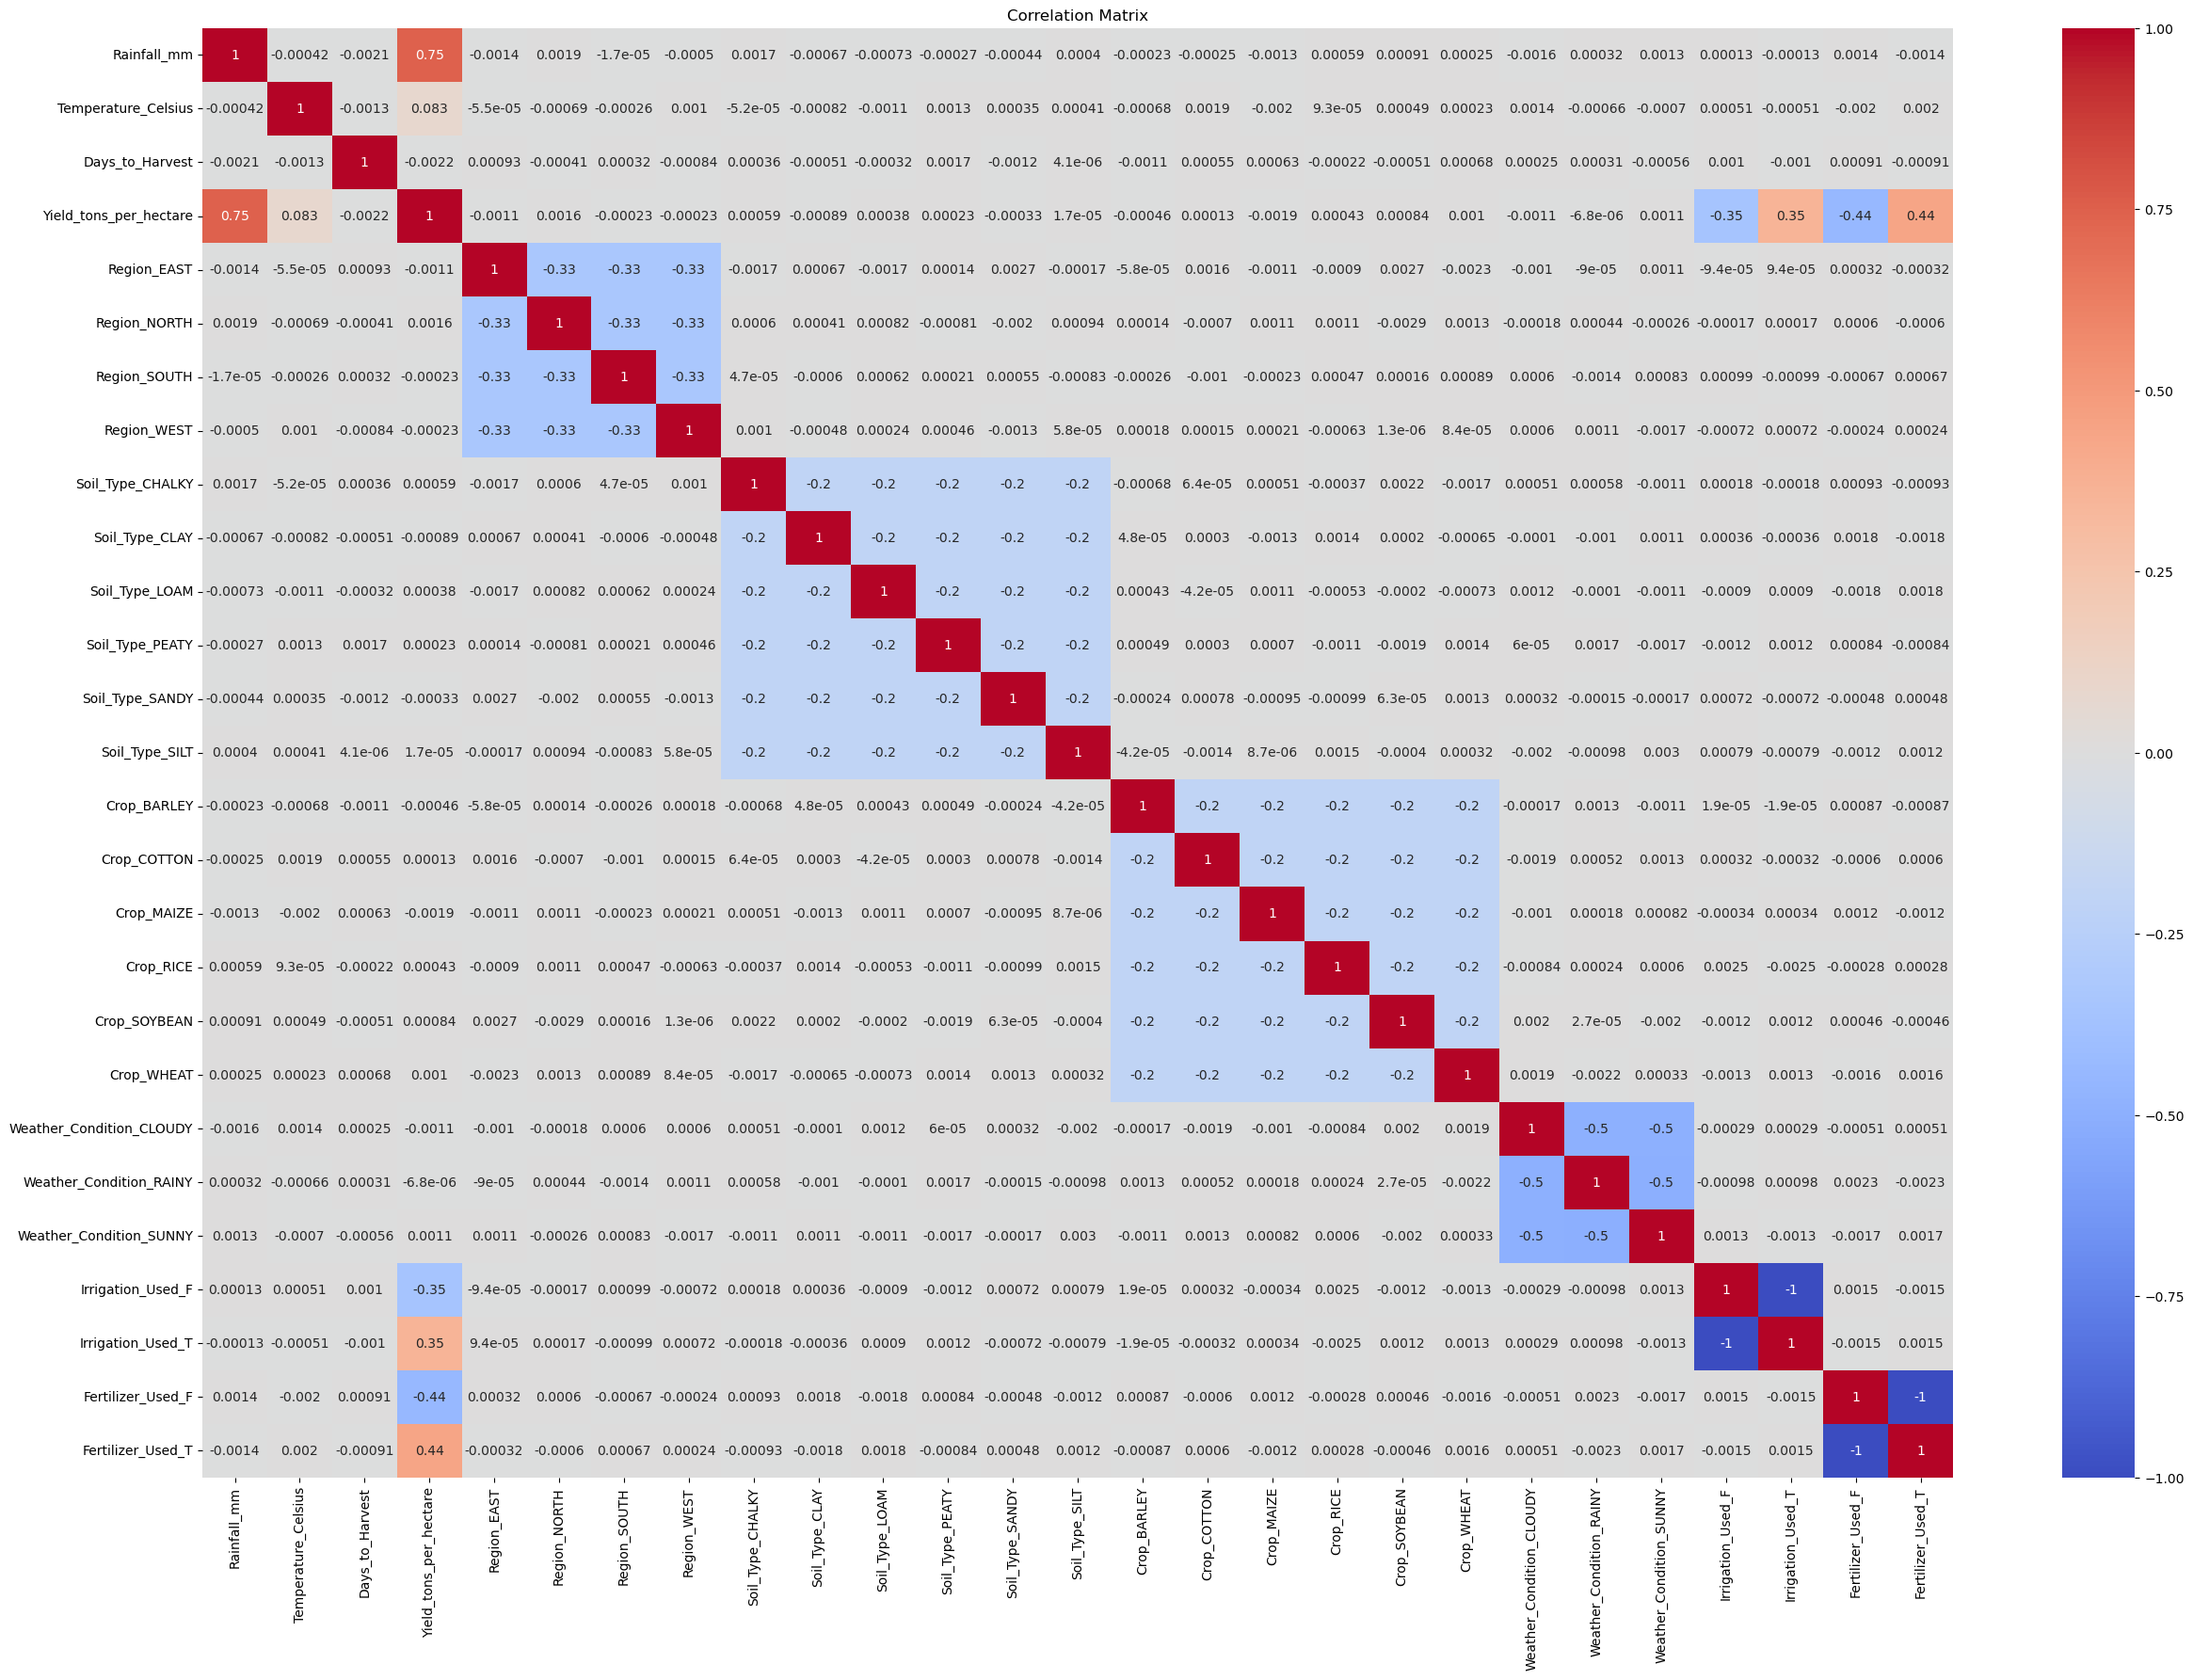

In [49]:
plt.figure(figsize=(30, 20))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Phase II

## Data distribution

In [52]:
X = encoded_df.drop(columns=['Yield_tons_per_hectare'])
Y = encoded_df['Yield_tons_per_hectare']

print(X.describe())
print(Y.describe())

         Rainfall_mm  Temperature_Celsius  Days_to_Harvest    Region_EAST  \
count  949908.000000        949908.000000    949908.000000  949908.000000   
mean        0.500150             0.500137       104.497036       0.249661   
std         0.281399             0.281489        25.299757       0.432817   
min         0.000000             0.000000        60.000000       0.000000   
25%         0.263156             0.263166        83.000000       0.000000   
50%         0.500067             0.500237       104.497607       0.000000   
75%         0.736633             0.736956       126.000000       0.000000   
max         1.000000             1.000000       149.000000       1.000000   

        Region_NORTH   Region_SOUTH    Region_WEST  Soil_Type_CHALKY  \
count  949908.000000  949908.000000  949908.000000     949908.000000   
mean        0.250164       0.250068       0.250106          0.166917   
std         0.433108       0.433052       0.433074          0.372902   
min         0.0000

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(759926, 26)
(189982, 26)
(759926,)
(189982,)


## 1. Linear Regression

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, Y_train)

y_pred_linear = linear_reg.predict(X_test_scaled)

linear_mse = mean_squared_error(Y_test, y_pred_linear)
linear_r2 = r2_score(Y_test, y_pred_linear)

In [57]:
print("Mean Squared Error(MSE): {0}".format(linear_mse))
print("R Squared (R^2): {0}".format(linear_r2))

Mean Squared Error(MSE): 0.3367309166905222
R Squared (R^2): 0.8827925052793918


### Refrence: https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

## 2. K - NN

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

mse_knn = mean_squared_error(Y_test, y_pred_knn)
r2_knn = r2_score(Y_test, y_pred_knn)

In [62]:
print("Mean Squared Error(MSE): {0}".format(mse_knn))
print("R Squared (R^2): {0}".format(r2_knn))

Mean Squared Error(MSE): 0.4327071963335081
R Squared (R^2): 0.8493855956908148


### Refrence: https://www.geeksforgeeks.org/k-nearest-neighbors-with-python-ml/

## 3. Naive Bayes based on high or low yields

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
# Make binary the target variables (e.g., high and low yields)
encoded_df['Yield_Category'] = (encoded_df['Yield_tons_per_hectare'] > encoded_df['Yield_tons_per_hectare'].median()).astype(int)
X_class = X
Y_class = encoded_df['Yield_Category']

print(Y_class.value_counts())

Yield_Category
1    474954
0    474954
Name: count, dtype: int64


In [67]:
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class, Y_class, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train_class, Y_train_class)

y_pred_nb = nb.predict(X_test_class)
accuracy_nb = accuracy_score(Y_test_class, y_pred_nb)

In [68]:
print("Naive Bayes Accuracy: {0}".format(accuracy_nb))

Naive Bayes Accuracy: 0.8968270678274783


In [69]:
precision = precision_score(Y_test_class, y_pred_nb, average='weighted')
recall = recall_score(Y_test_class, y_pred_nb, average='weighted')
f1 = f1_score(Y_test_class, y_pred_nb, average='weighted')

In [70]:
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))
print("F1-score: {0}".format(f1))

Precision: 0.896830261729337
Recall: 0.8968270678274783
F1-score: 0.8968267582287069


### Refrence: https://www.geeksforgeeks.org/ml-naive-bayes-scratch-implementation-using-python/
https://medium.com/@karinathpa/implementing-naïve-bais-classifier-using-python-fa19d1279a9a

## 4. Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, Y_train)

y_pred_rf = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

In [75]:
print("Random Forest MSE: {0}".format(mse_rf))
print("Random Forest R-squared: {0}".format(r2_rf))

Random Forest MSE: 0.3583802781108088
Random Forest R-squared: 0.875256911460708


### Refrence: https://www.geeksforgeeks.org/random-forest-regression-in-python/

## 5. Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, Y_train)

dt_predictions = dt_regressor.predict(X_test)

dt_mse = mean_squared_error(Y_test, dt_predictions)
dt_r2 = r2_score(Y_test, dt_predictions)

In [80]:
print("DecisionTreeRegressor MSE: {0}".format(dt_mse))
print("DecisionTreeRegressor R² Score: {0}".format(dt_r2))

DecisionTreeRegressor MSE: 0.710418524606411
DecisionTreeRegressor R² Score: 0.7527213233326138


### Refrence: https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

## 6. Elastic Net Regression 

In [83]:
from sklearn.linear_model import ElasticNet

In [84]:
elastic_net_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

elastic_net_regressor.fit(X_train, Y_train)

elastic_net_predictions = elastic_net_regressor.predict(X_test)

elastic_net_mse = mean_squared_error(Y_test, elastic_net_predictions)
elastic_net_r2 = r2_score(Y_test, elastic_net_predictions)

In [85]:
print("ElasticNet R² Score: {0}".format(elastic_net_r2))
print("ElasticNet MSE: {0}".format(elastic_net_mse))

ElasticNet R² Score: 0.7348190315773414
ElasticNet MSE: 0.7618508594411739


### Refrence: https://www.geeksforgeeks.org/what-is-elasticnet-in-sklearn/

## 7. XGBoost Regression

In [88]:
import xgboost as xgb

In [95]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

xgb_predictions = xgb_model.predict(dtest)

xgb_mse = mean_squared_error(Y_test, xgb_predictions)
xgb_r2 = r2_score(Y_test, xgb_predictions)

In [96]:
print("XGBoost Regressor MSE: {0}".format(xgb_mse))
print("XGBoost Regressor R² Score: {0}".format(xgb_r2))

XGBoost Regressor MSE: 0.3371910075699757
XGBoost Regressor R² Score: 0.8826323593092665


### Refrence: https://www.geeksforgeeks.org/xgboost-for-regression/
https://www.datacamp.com/tutorial/xgboost-in-python

## Graphs & Plots

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
models = {
    'Linear Regression': y_pred_linear,
    'KNN Regression': y_pred_knn,
    'Random Forest Regression': y_pred_rf,
    'Decision Tree Regression': dt_predictions,
    'ElasticNet Regression': elastic_net_predictions,
    'XGBoost Regression': xgb_predictions
}

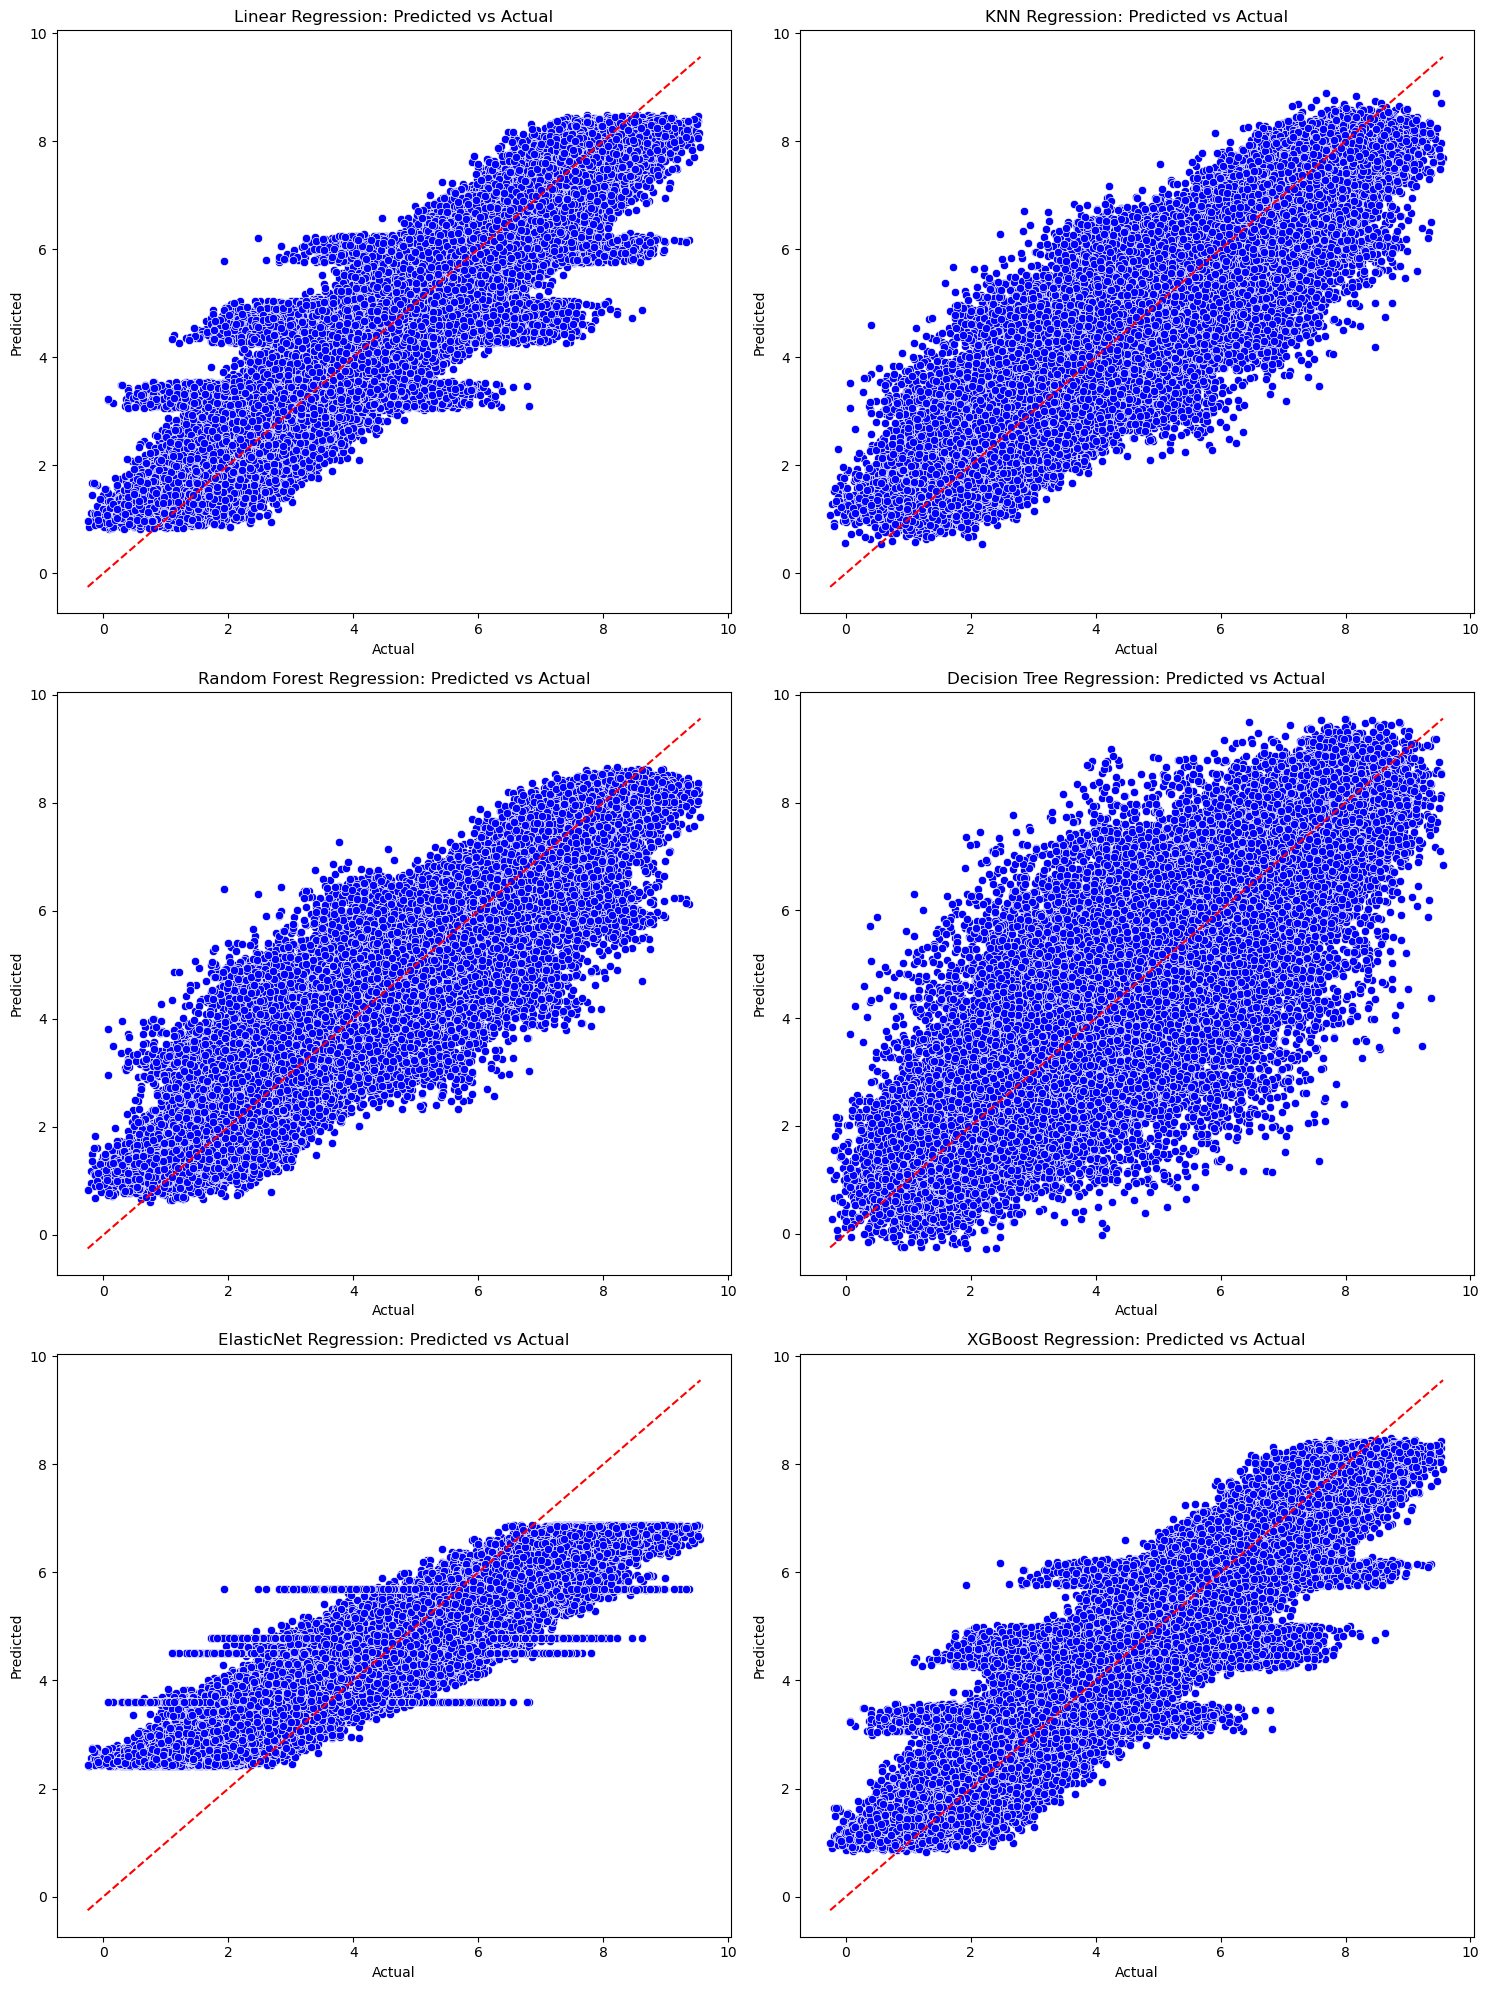

In [116]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))
ax = ax.flatten()

for i, (model_name, predictions) in enumerate(models.items()):
    sns.scatterplot(x=Y_test, y=predictions, ax=ax[i], color='blue')
    ax[i].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Diagonal line
    ax[i].set_title(f'{model_name}: Predicted vs Actual')
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

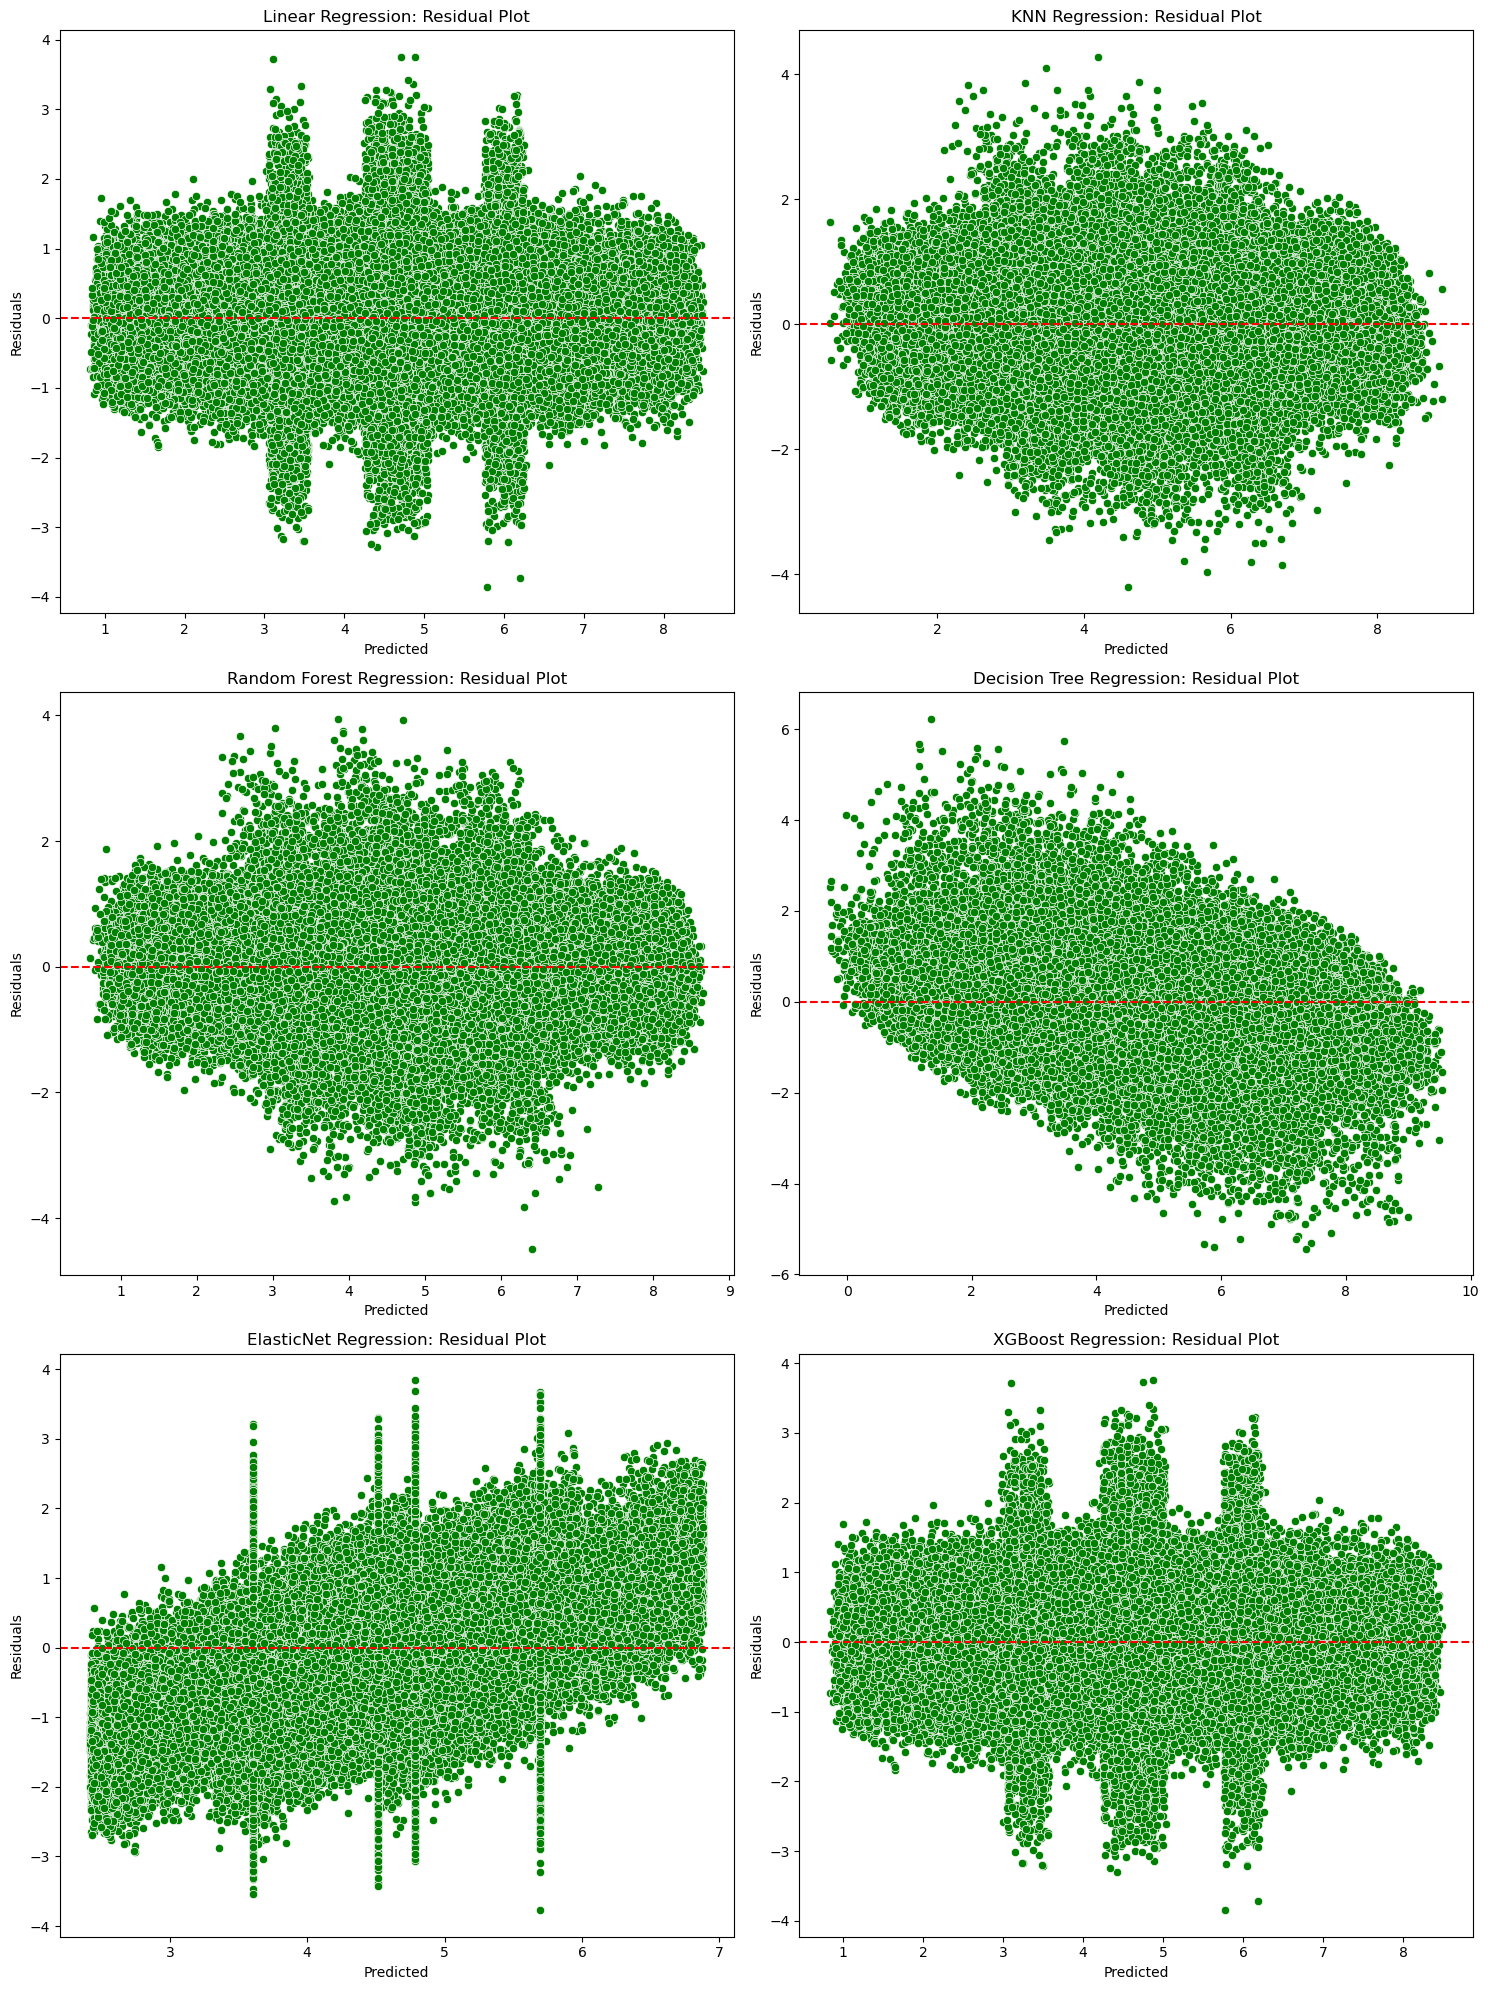

In [140]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20)) 
ax = ax.flatten()

for i, (model_name, predictions) in enumerate(models.items()):
    residuals = Y_test - predictions
    sns.scatterplot(x=predictions, y=residuals, ax=ax[i], color='green')
    ax[i].axhline(y=0, color='red', linestyle='--')
    ax[i].set_title(f'{model_name}: Residual Plot')
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

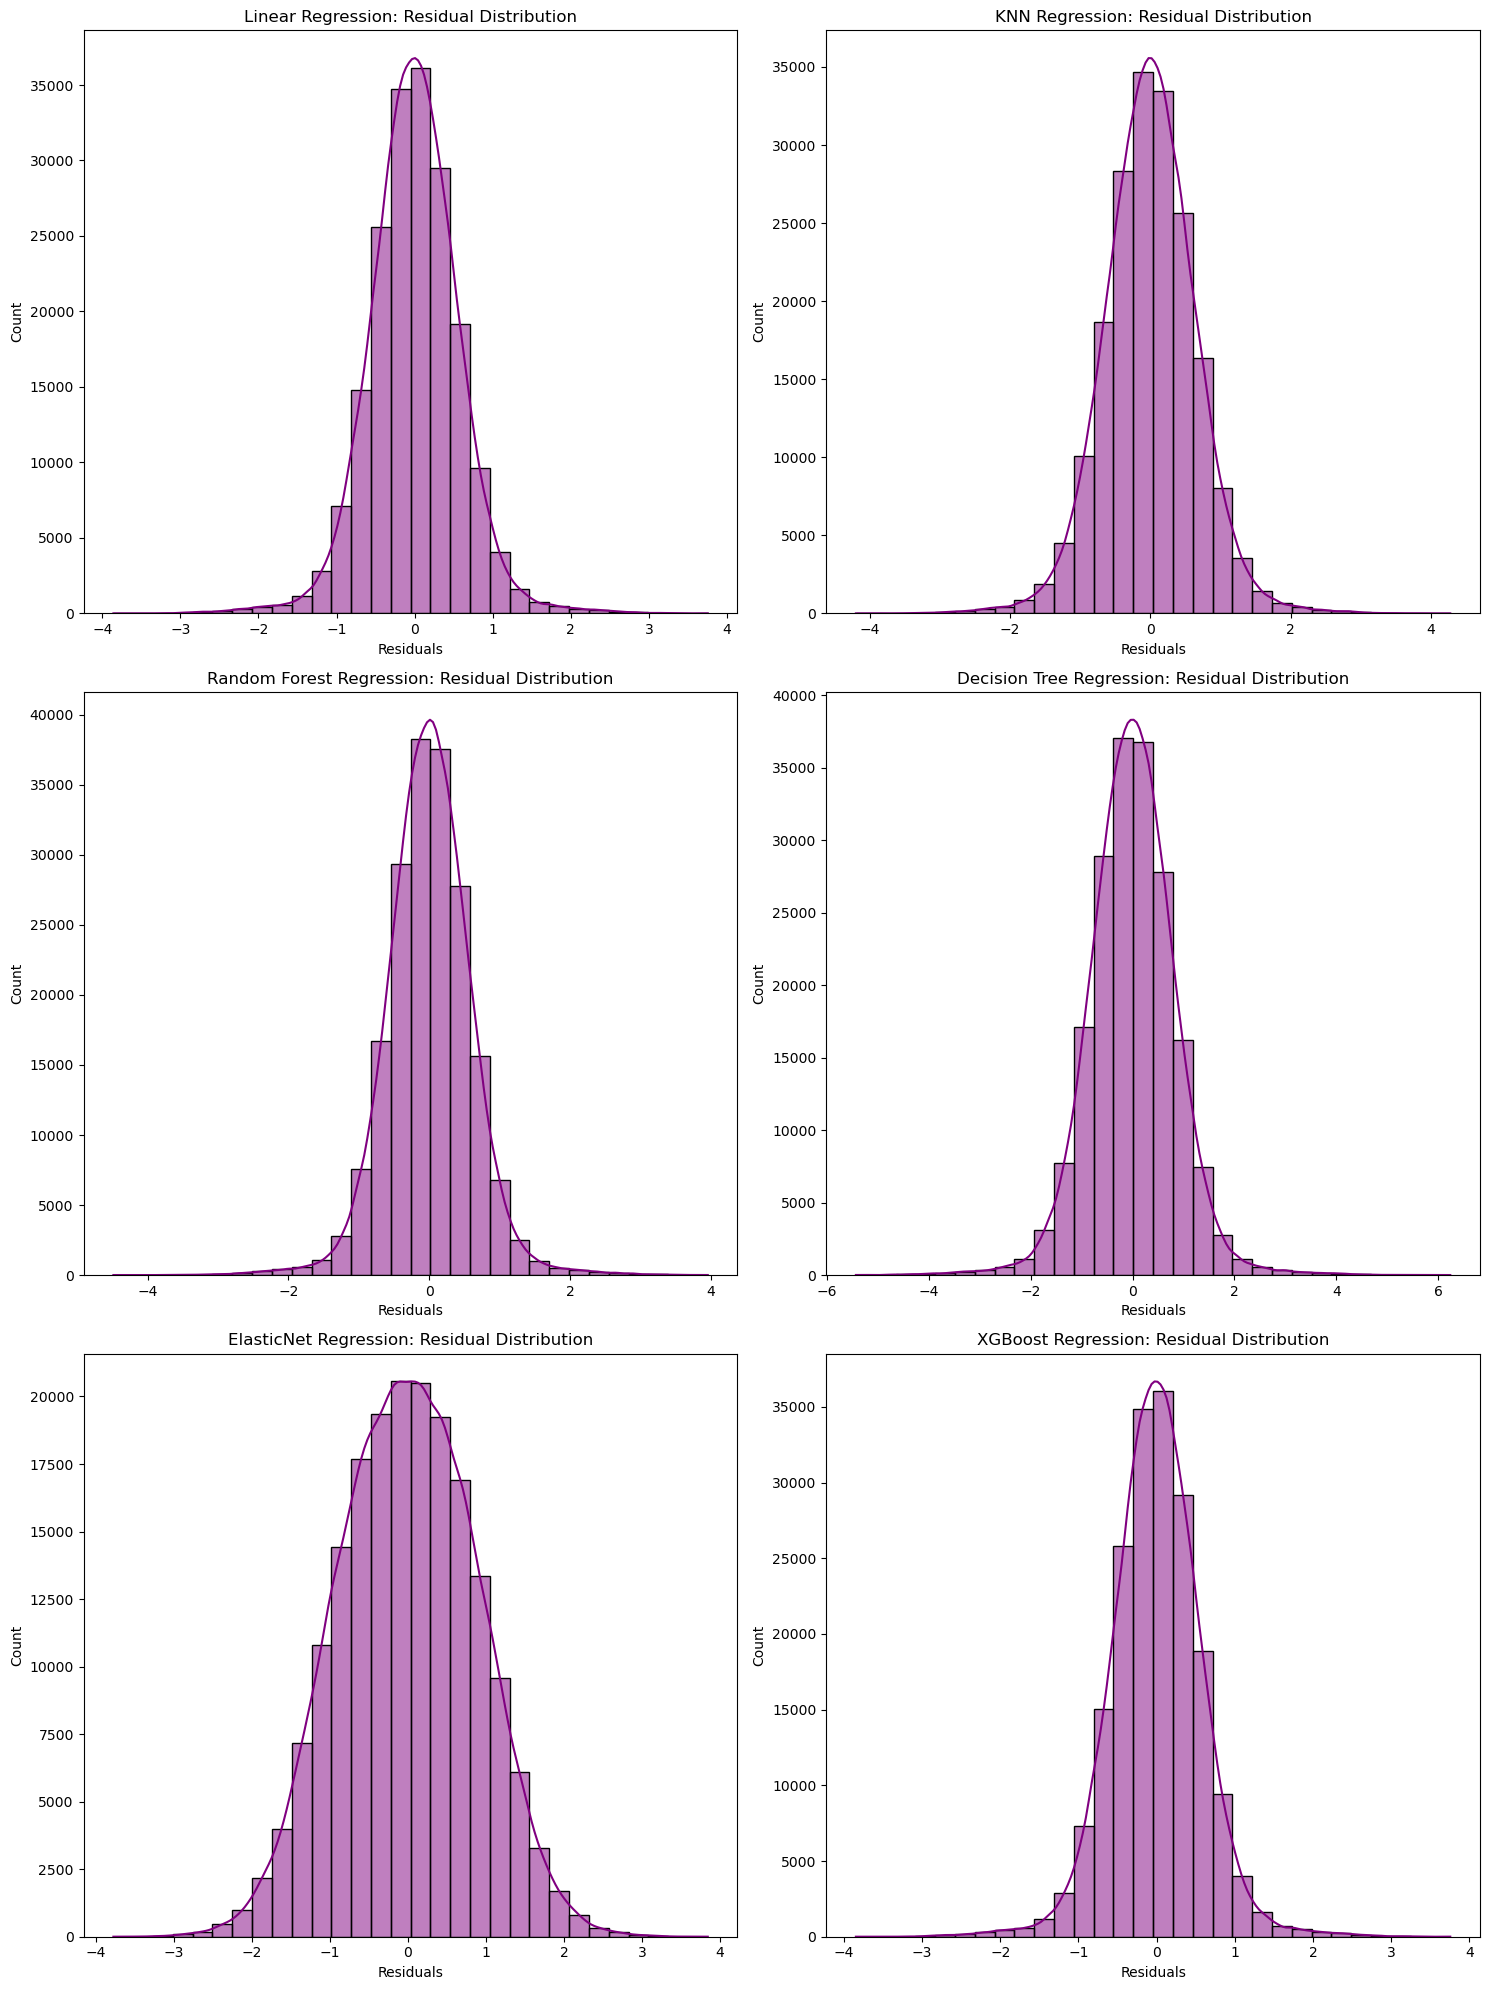

In [146]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))
ax = ax.flatten()

for i, (model_name, predictions) in enumerate(models.items()):
    residuals = Y_test - predictions
    sns.histplot(residuals, bins=30, kde=True, ax=ax[i], color='purple')
    ax[i].set_title(f'{model_name}: Residual Distribution')
    ax[i].set_xlabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
performance = {}
for model_name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    performance[model_name] = {'MSE': mse, 'R2': r2}

import pandas as pd
performance_df = pd.DataFrame(performance).T 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=performance_df.index, y=performance_df['MSE'], ax=ax[0], palette='coolwarm')
ax[0].set_title('Model Comparison: MSE')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MSE')

sns.barplot(x=performance_df.index, y=performance_df['R2'], ax=ax[1], palette='coolwarm')
ax[1].set_title('Model Comparison: R2 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()